In [1]:
%load_ext autoreload
%autoreload 2
import HammingCode
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import erfc
import NeuralNetworkCorrection as network
import Autoencoder
import math
import Utils

2024-06-03 13:01:31.496775: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-03 13:01:31.496869: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-03 13:01:31.503615: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-03 13:01:31.531067: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-03 13:01:33.082728: W tensorflow/compiler/tf2

In [2]:
variancia = 1
code_rate = 4/7
# amostra
Eb_dB_values = np.arange(3, 16, 1)

# Gerar dados de treinamento
training_sample_length = 10 ** 3
epoches = 100
batch_size = 32

In [3]:
training_data = {
    'original': [],
    'noisy': [],
    'info': []
}

training_information = network.get_training_data_set(training_sample_length)

for eb_db in Eb_dB_values:
    info = network.generate_data_for_training(training_information, eb_db, variancia)
    training_data['noisy'].extend(info['split_noisy_original_data_15_11'])
    training_data['original'].extend(info['split_original_data_15_11'])

training_data['noisy'] = np.array(training_data['noisy'])
training_data['original'] = np.array(training_data['original'])

In [4]:
# Criar e treinar a rede neural
model = network.train_neural_network(training_data, epoches, batch_size)

[[0 1 1 ... 1 0 1]
 [1 1 1 ... 1 0 1]
 [1 1 1 ... 1 1 0]
 ...
 [0 0 1 ... 1 0 0]
 [1 0 0 ... 0 0 0]
 [1 1 1 ... 1 0 0]]
Epoch 1/100
34/34 [==============================] - 2s 15ms/step - loss: 0.4608 - accuracy: 0.1363 - val_loss: 0.1796 - val_accuracy: 0.1681 - lr: 0.0010
Epoch 2/100
34/34 [==============================] - 0s 8ms/step - loss: 0.0796 - accuracy: 0.1588 - val_loss: 0.0293 - val_accuracy: 0.2773 - lr: 0.0010
Epoch 3/100
34/34 [==============================] - 0s 8ms/step - loss: 0.0283 - accuracy: 0.1974 - val_loss: 0.0213 - val_accuracy: 0.2017 - lr: 0.0010
Epoch 4/100
34/34 [==============================] - 0s 7ms/step - loss: 0.0241 - accuracy: 0.2829 - val_loss: 0.0234 - val_accuracy: 0.0252 - lr: 0.0010
Epoch 5/100
34/34 [==============================] - 0s 7ms/step - loss: 0.0217 - accuracy: 0.1664 - val_loss: 0.0219 - val_accuracy: 0.3277 - lr: 0.0010
Epoch 6/100
34/34 [==============================] - 0s 7ms/step - loss: 0.0191 - accuracy: 0.2284 - val_loss

In [5]:
autoencoder = Autoencoder.create_and_train_auto_encoder(training_data, epoches, batch_size)

Epoch 1/100
37/37 [==============================] - 2s 12ms/step - loss: 0.6813 - accuracy: 0.0727 - val_loss: 0.6664 - val_accuracy: 0.0668
Epoch 2/100
37/37 [==============================] - 0s 7ms/step - loss: 0.6548 - accuracy: 0.1090 - val_loss: 0.6420 - val_accuracy: 0.1217
Epoch 3/100
37/37 [==============================] - 0s 7ms/step - loss: 0.6297 - accuracy: 0.1352 - val_loss: 0.6159 - val_accuracy: 0.1200
Epoch 4/100
37/37 [==============================] - 0s 5ms/step - loss: 0.6030 - accuracy: 0.1268 - val_loss: 0.5891 - val_accuracy: 0.1302
Epoch 5/100
37/37 [==============================] - 0s 5ms/step - loss: 0.5763 - accuracy: 0.1319 - val_loss: 0.5618 - val_accuracy: 0.1420
Epoch 6/100
37/37 [==============================] - 0s 6ms/step - loss: 0.5476 - accuracy: 0.1640 - val_loss: 0.5312 - val_accuracy: 0.1623
Epoch 7/100
37/37 [==============================] - 0s 5ms/step - loss: 0.5149 - accuracy: 0.1555 - val_loss: 0.4971 - val_accuracy: 0.1513
Epoch 8/100


In [6]:
# Gerar dados de teste
amostras_ruidosas = []
amostras_originais = []
ML_result = []
tradicional_result = []
autoencoder_result = []


In [7]:
test_data = {
    'original': [],
    'info': []
}
test_sample_length = 10 ** 3
test_information = network.get_training_data_set(test_sample_length)

total_chunks = math.floor(test_sample_length / 11)
total_length_chunks = total_chunks * 11
smaller_array_len = test_sample_length - total_length_chunks

adjustment_test = 11 - smaller_array_len

for eb_db in Eb_dB_values:
    info = network.generate_data_for_training(test_information, eb_db, variancia)
    test_data['info'].append(info)
    test_data['original'] = info['original_data']

In [8]:
i = 0
autoencoder_result.append(network.decode_and_correct(test_data['info'][i]['split_noisy_original_data_15_11'], autoencoder))
ML_result.append(network.decode_and_correct(test_data['info'][i]['split_noisy_original_data_15_11'], model))

In [9]:
i = 1
autoencoder_result.append(network.decode_and_correct(test_data['info'][i]['split_noisy_original_data_15_11'], autoencoder))
ML_result.append(network.decode_and_correct(test_data['info'][i]['split_noisy_original_data_15_11'], model))

In [10]:
i = 2
autoencoder_result.append(network.decode_and_correct(test_data['info'][i]['split_noisy_original_data_15_11'], autoencoder))
ML_result.append(network.decode_and_correct(test_data['info'][i]['split_noisy_original_data_15_11'], model))

In [11]:
i = 3
autoencoder_result.append(network.decode_and_correct(test_data['info'][i]['split_noisy_original_data_15_11'], autoencoder))
ML_result.append(network.decode_and_correct(test_data['info'][i]['split_noisy_original_data_15_11'], model))


In [12]:
i = 4
autoencoder_result.append(network.decode_and_correct(test_data['info'][i]['split_noisy_original_data_15_11'], autoencoder))
ML_result.append(network.decode_and_correct(test_data['info'][i]['split_noisy_original_data_15_11'], model))


In [13]:
i = 5
autoencoder_result.append(network.decode_and_correct(test_data['info'][i]['split_noisy_original_data_15_11'], autoencoder))
ML_result.append(network.decode_and_correct(test_data['info'][i]['split_noisy_original_data_15_11'], model))

In [14]:
i = 6
autoencoder_result.append(network.decode_and_correct(test_data['info'][i]['split_noisy_original_data_15_11'], autoencoder))
ML_result.append(network.decode_and_correct(test_data['info'][i]['split_noisy_original_data_15_11'], model))


In [15]:
i = 7
autoencoder_result.append(network.decode_and_correct(test_data['info'][i]['split_noisy_original_data_15_11'], autoencoder))
ML_result.append(network.decode_and_correct(test_data['info'][i]['split_noisy_original_data_15_11'], model))


In [16]:
i = 8
autoencoder_result.append(network.decode_and_correct(test_data['info'][i]['split_noisy_original_data_15_11'], autoencoder))
ML_result.append(network.decode_and_correct(test_data['info'][i]['split_noisy_original_data_15_11'], model))


In [17]:
i = 9
autoencoder_result.append(network.decode_and_correct(test_data['info'][i]['split_noisy_original_data_15_11'], autoencoder))
ML_result.append(network.decode_and_correct(test_data['info'][i]['split_noisy_original_data_15_11'], model))


In [18]:
i = 10
autoencoder_result.append(network.decode_and_correct(test_data['info'][i]['split_noisy_original_data_15_11'], autoencoder))
ML_result.append(network.decode_and_correct(test_data['info'][i]['split_noisy_original_data_15_11'], model))


In [19]:
i = 11
autoencoder_result.append(network.decode_and_correct(test_data['info'][i]['split_noisy_original_data_15_11'], autoencoder))
ML_result.append(network.decode_and_correct(test_data['info'][i]['split_noisy_original_data_15_11'], model))


In [20]:
i = 12
autoencoder_result.append(network.decode_and_correct(test_data['info'][i]['split_noisy_original_data_15_11'], autoencoder))
ML_result.append(network.decode_and_correct(test_data['info'][i]['split_noisy_original_data_15_11'], model))


In [24]:
for i in test_data['info']:
   tradicional_result.append(HammingCode.decode_sample(i['split_encoded_data']))

In [25]:
BER_tradicional = []
BER_autoencoder = []
BER_ML = []
paddded_array = test_data['info'][0]['padded_array_original_data']
for i in range(0, len(autoencoder_result)):
    BER_ML.append(np.sum(np.array(ML_result[i]).astype(int) != paddded_array) / len(paddded_array))
    BER_tradicional.append(np.sum(np.array(tradicional_result[i]).astype(int) != test_data['original']) / len(test_data['original']))
    BER_autoencoder.append(np.sum(np.array(autoencoder_result[i]).astype(int) != paddded_array) / len(paddded_array))

# Calcular a BER teórica
Eb_coded = np.array([eb_db + 10*np.log10(code_rate) for eb_db in Eb_dB_values])
Eb_values = 10**(Eb_coded/10)
BER_teorica = 0.5 * erfc(np.sqrt(Eb_values))

ValueError: operands could not be broadcast together with shapes (1004,) (1000,) 

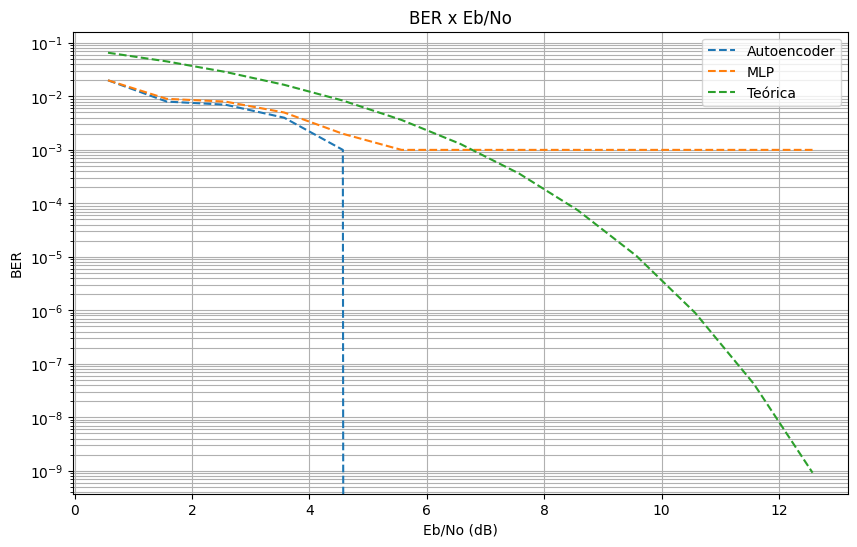

In [23]:
# Plotar as taxas de erro de bit simuladas e teóricas
plt.figure(figsize=(10, 6))
#plt.semilogy(Eb_coded, BER_tradicional, linestyle = '--', label='Codificado')
plt.semilogy(Eb_coded, BER_autoencoder, linestyle = '--', label='Autoencoder')
plt.semilogy(Eb_coded, BER_ML, linestyle = '--', label='MLP')
plt.semilogy(Eb_coded, BER_teorica, linestyle='--', label='Teórica')
plt.xlabel('Eb/No (dB)')
plt.ylabel('BER')
plt.grid(True, which='both')
plt.legend()
plt.title('BER x Eb/No')
plt.show()